In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_52854/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 162ms/step


(array([[0.22789796]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[1161.7595]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1161.759521,1071.796143,1017.247742,969.863892,1093.694214,1099.476440,1159.821045,1110.332520,1130.182129,1139.590454,1145.680542,1142.281860
2018-01-09,1299.739990,1157.039185,1122.892944,1068.640015,1011.140869,1141.318970,1145.764404,1155.116333,1150.045776,1164.790894,1173.355103,1177.904419,1182.993652
2018-01-10,1255.819946,1311.212524,1211.526611,1132.890747,1067.676636,1221.959229,1227.710571,1308.515259,1248.896118,1265.731934,1281.299805,1286.055542,1279.786133
2018-01-11,1154.930054,1266.357056,1247.397705,1179.582275,1113.779419,1267.893311,1270.730835,1263.941162,1271.525635,1287.727783,1298.712036,1301.375122,1310.651978
2018-01-12,1273.199951,1163.550049,1241.598145,1200.916138,1141.187378,1270.636230,1262.381348,1161.605347,1228.712891,1236.851196,1233.921509,1236.316895,1267.225708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1830.385132,1949.977783,2014.282715,2041.163086,2059.175781,2017.099121,1821.186035,1908.433594,1908.641968,1881.381714,1884.482056,1929.625732
2022-05-28,1757.941772,1748.536133,1857.481934,1966.924927,2002.433716,1985.399536,1929.161377,1740.751709,1815.886230,1819.077148,1783.115845,1788.256104,1834.468384
2022-05-29,1812.031006,1782.727417,1795.949707,1926.075806,1971.042114,1941.320068,1881.765015,1774.369263,1786.372192,1802.065063,1771.786255,1779.740723,1809.937378


# CNN Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

In [26]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,0.225100,0.234256,0.223907,0.212832,0.202770,0.249319,0.221678,0.244632,0.225263,0.227450,0.231058,0.230498,0.230241
2018-01-09,0.257083,0.233221,0.235610,0.224556,0.212529,0.261412,0.231897,0.243565,0.234039,0.234983,0.238352,0.237497,0.239194
2018-01-10,0.247793,0.267030,0.255910,0.239213,0.225897,0.281887,0.249987,0.278357,0.255883,0.256954,0.261670,0.260988,0.260480
2018-01-11,0.226453,0.257193,0.264126,0.249865,0.236797,0.293550,0.259485,0.268247,0.260883,0.261742,0.265431,0.264315,0.267268
2018-01-12,0.251469,0.234649,0.262798,0.254732,0.243278,0.294246,0.257641,0.245037,0.251423,0.250668,0.251435,0.250184,0.257718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.347016,0.380877,0.425045,0.440281,0.456069,0.494462,0.424256,0.394637,0.401629,0.396893,0.391296,0.390966,0.403389
2022-05-28,0.354000,0.362929,0.403859,0.429478,0.446911,0.475729,0.404843,0.376393,0.381177,0.377398,0.370069,0.370066,0.382463
2022-05-29,0.365441,0.370427,0.389766,0.420159,0.439489,0.464537,0.394379,0.384018,0.374655,0.373695,0.367622,0.368216,0.377068


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1284, 12), (1284,), (160, 12), (160,), (161, 12), (161,))

In [29]:
meta_training_X

,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,
2018-01-08,0.234256,0.223907,0.212832,0.202770,0.249319,0.221678,0.244632,0.225263,0.227450,0.231058,0.230498,0.230241
2018-01-09,0.233221,0.235610,0.224556,0.212529,0.261412,0.231897,0.243565,0.234039,0.234983,0.238352,0.237497,0.239194
2018-01-10,0.267030,0.255910,0.239213,0.225897,0.281887,0.249987,0.278357,0.255883,0.256954,0.261670,0.260988,0.260480
2018-01-11,0.257193,0.264126,0.249865,0.236797,0.293550,0.259485,0.268247,0.260883,0.261742,0.265431,0.264315,0.267268
2018-01-12,0.234649,0.262798,0.254732,0.243278,0.294246,0.257641,0.245037,0.251423,0.250668,0.251435,0.250184,0.257718
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,0.459228,0.495093,0.508200,0.514499,0.574341,0.482211,0.473900,0.467619,0.461074,0.456501,0.455983,0.469375
2021-07-11,0.451127,0.479533,0.502159,0.511745,0.561698,0.471077,0.465733,0.458056,0.453674,0.448969,0.448750,0.461088
2021-07-12,0.457614,0.481068,0.496190,0.509649,0.554482,0.466384,0.472274,0.460081,0.454868,0.451068,0.451126,0.461304


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 12, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 12, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 12, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((1284, 12, 1), (160, 12, 1), (161, 12, 1))

In [31]:
meta_training_X[0]

array([[0.23425648],
       [0.22390668],
       [0.21283217],
       [0.20276982],
       [0.24931937],
       [0.2216779 ],
       [0.24463186],
       [0.2252626 ],
       [0.2274497 ],
       [0.2310583 ],
       [0.230498  ],
       [0.23024121]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((1284, 1), (160, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model = keras.Sequential([
    keras.layers.Conv1D(filters = 256, kernel_size = 8, activation = 'ReLU', input_shape = (12, 1)),
    keras.layers.MaxPooling1D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
])

meta_model.compile(optimizer = Adam(learning_rate=0.001), loss = 'mse', metrics = ['mae', 'mse'])

In [35]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 500, validation_data = (meta_validation_X, meta_validation_y), batch_size = 512)

Epoch 1/500
3/3 [==============================] - 0s 41ms/step - loss: 0.0270 - mae: 0.0904 - mse: 0.0270 - val_loss: 0.2633 - val_mae: 0.4994 - val_mse: 0.2633
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0109 - mae: 0.0532 - mse: 0.0109 - val_loss: 0.1020 - val_mae: 0.3071 - val_mse: 0.1020
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0033 - mae: 0.0405 - mse: 0.0033 - val_loss: 0.0218 - val_mae: 0.1342 - val_mse: 0.0218
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0434 - mse: 0.0021 - val_loss: 0.0021 - val_mae: 0.0366 - val_mse: 0.0021
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0480 - mse: 0.0025 - val_loss: 0.0022 - val_mae: 0.0378 - val_mse: 0.0022
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0.0353 - mse: 0.0015 - val_loss: 0.0016 - val_mae: 0.0325 - val_mse: 0.0016
Epoch 7/500
3/3 [================

In [36]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

6/6 [==============================] - 0s 610us/step


,Actual,Predicted
0,0.824444,0.783766
1,0.851078,0.781490
2,0.838380,0.800440
3,0.847961,0.794530
4,0.842472,0.800144
...,...,...
156,0.347016,0.370342
157,0.354000,0.351238
158,0.365441,0.350611
159,0.404446,0.359010


In [37]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [38]:
test_results

,Actual,Predicted
0,3844.259851,3659.284912
1,3965.367221,3648.934082
2,3907.627114,3735.104980
3,3951.195307,3708.230225
4,3926.233548,3733.758789
...,...,...
156,1673.283113,1779.350098
157,1705.041064,1692.482056
158,1757.064667,1689.630615
159,1934.432444,1727.824219


In [39]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [40]:
test_results

,Actual,Predicted
2021-12-22,3844.259851,3659.284912
2021-12-23,3965.367221,3648.934082
2021-12-24,3907.627114,3735.104980
2021-12-25,3951.195307,3708.230225
2021-12-26,3926.233548,3733.758789
...,...,...
2022-05-27,1673.283113,1779.350098
2022-05-28,1705.041064,1692.482056
2022-05-29,1757.064667,1689.630615
2022-05-30,1934.432444,1727.824219


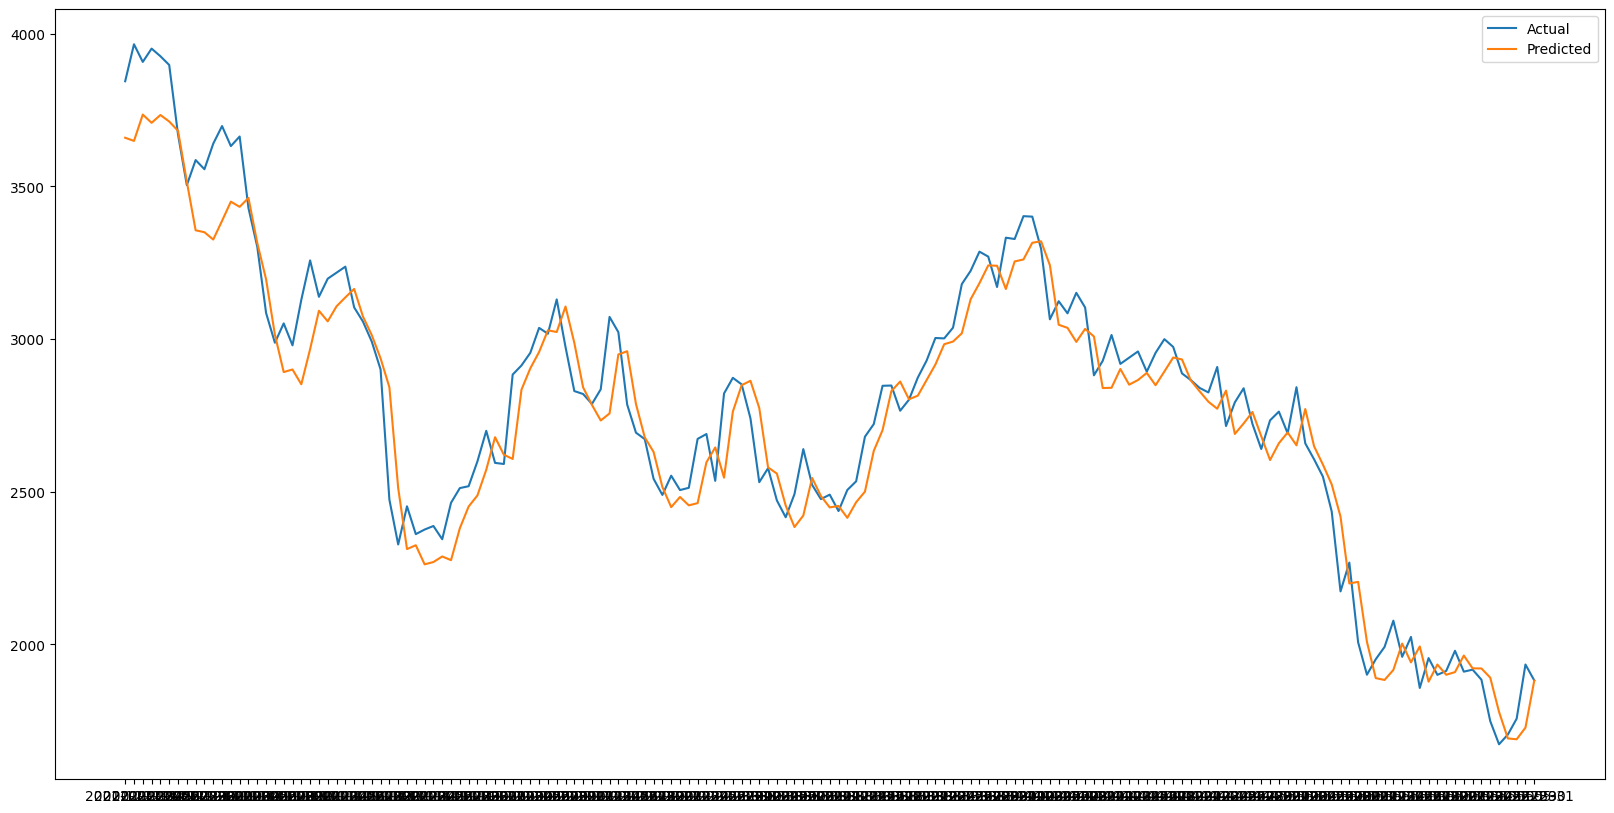

In [41]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [42]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 128.8167193252753, MAE: 102.03167993784878
